# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import time
import datetime as dt
from datetime import timedelta
from datetime import datetime

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
time.sleep(1)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Gather the html from the current page in the browser
html = browser.html

In [5]:
# Create a Beautiful Soup Object
weather_soup = soup(html, 'html.parser')
print(weather_soup.find('title'))

<title>Mars Temperature Data</title>


In [6]:
# Extract all rows of data
mars_weather_data = weather_soup.find_all('tr',class_='data-row')
len(mars_weather_data)

1867

In [7]:
mars_weather_data = weather_soup.find_all('tr',class_='data-row')
mars_weather_data

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
table_weather_data= []
# Loop through the scraped data to create a list of rows
for row in mars_weather_data:
   
    #extract list of tds from table row
    row_data = row.select('td')
    #create a temporary row data list
    temp_row_data = []
    #loop through the row_data to and append to temp_row_data
    for td in row_data:
    #append data to temp list
        temp_row_data.append(td.text)
    #append temp_row_data to all_rows_weather_data
        table_weather_data.append(temp_row_data)

In [9]:
table_weather_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['2

In [10]:
temp_row_data

['1895', '2018-02-27', '1977', '135', '5', '-77.0', '727.0']

In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df=pd.DataFrame(table_weather_data, columns=['id','terrestrial_date',
                                                          'sol', 'ls','month','min_temp','pressure'])

In [12]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,2,2012-08-16,10,155,6,-75.0,739.0
2,2,2012-08-16,10,155,6,-75.0,739.0
3,2,2012-08-16,10,155,6,-75.0,739.0
4,2,2012-08-16,10,155,6,-75.0,739.0
...,...,...,...,...,...,...,...
13064,1895,2018-02-27,1977,135,5,-77.0,727.0
13065,1895,2018-02-27,1977,135,5,-77.0,727.0
13066,1895,2018-02-27,1977,135,5,-77.0,727.0
13067,1895,2018-02-27,1977,135,5,-77.0,727.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
df.info

<bound method DataFrame.info of          id terrestrial_date   sol   ls month min_temp pressure
0         2       2012-08-16    10  155     6    -75.0    739.0
1         2       2012-08-16    10  155     6    -75.0    739.0
2         2       2012-08-16    10  155     6    -75.0    739.0
3         2       2012-08-16    10  155     6    -75.0    739.0
4         2       2012-08-16    10  155     6    -75.0    739.0
...     ...              ...   ...  ...   ...      ...      ...
13064  1895       2018-02-27  1977  135     5    -77.0    727.0
13065  1895       2018-02-27  1977  135     5    -77.0    727.0
13066  1895       2018-02-27  1977  135     5    -77.0    727.0
13067  1895       2018-02-27  1977  135     5    -77.0    727.0
13068  1895       2018-02-27  1977  135     5    -77.0    727.0

[13069 rows x 7 columns]>

In [14]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis
df= df.astype({"id": int,
                                          "terrestrial_date": "datetime64[ns]",
                                          "sol": int,
                                          "ls": int,
                                          "month": int,
                                          "min_temp": float,
                                          "pressure": float})

In [16]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [17]:
# How many months exist on Mars? Answer: 12 months
df['month'].value_counts().sort_index()

month
1     1218
2     1246
3     1344
4     1358
5     1043
6     1029
7      994
8      987
9      938
10     784
11     966
12    1162
Name: count, dtype: int64

In [18]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset? Answer: 1867 Martian days
df['sol'].nunique()

1867

In [19]:
# What is the average low temperature by month?
avg_low_temp = df.groupby('month')['min_temp'].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

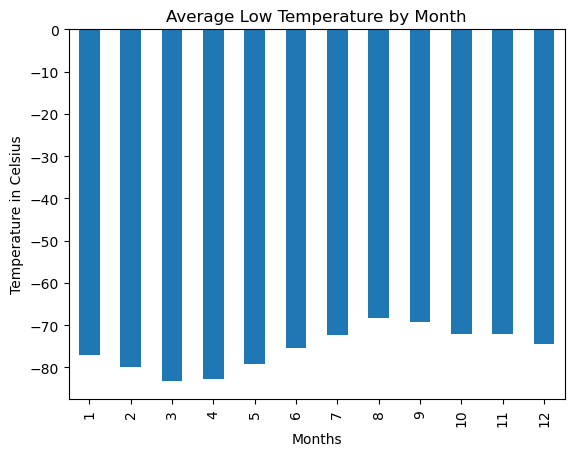

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot the average temperature by month
avg_low_temp.plot.bar()
plt.title('Average Low Temperature by Month')
plt.xlabel('Months')
plt.ylabel('Temperature in Celsius')
plt.show()
plt.tight_layout()

In [21]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 

#Find the average minimum daily temperature for all of the months.
min_temp = avg_low_temp.sort_values()
min_temp

#answer: the third month on average has the coldest minimum temperature(-.83) and the eighth month is the warmest(-.68)

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

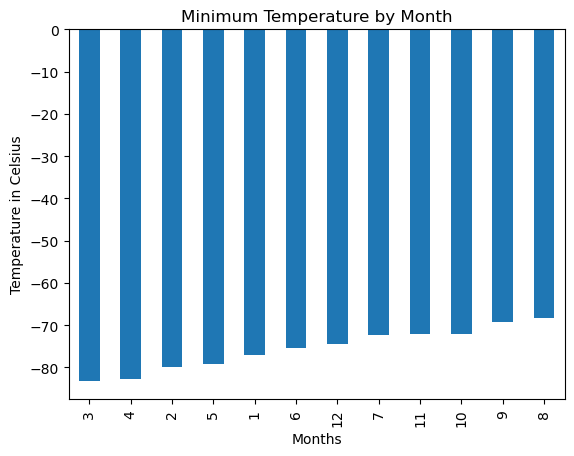

<Figure size 640x480 with 0 Axes>

In [22]:
#Plot the results as a bar chart
min_temp.plot.bar()
plt.title('Minimum Temperature by Month')
plt.xlabel('Months')
plt.ylabel('Temperature in Celsius')
plt.show()
plt.tight_layout()

In [23]:
# Average pressure by Martian month. Which months have the lowest and the highest atmospheric pressure on Mars?

#Find the average daily atmospheric pressure of all the months.
avg_pressure = df.groupby('month')['pressure'].mean()
avg_pressure
#answer: the six month on average has the lowest atmospheric pressure (745) and the highest is on the ninth month (913)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

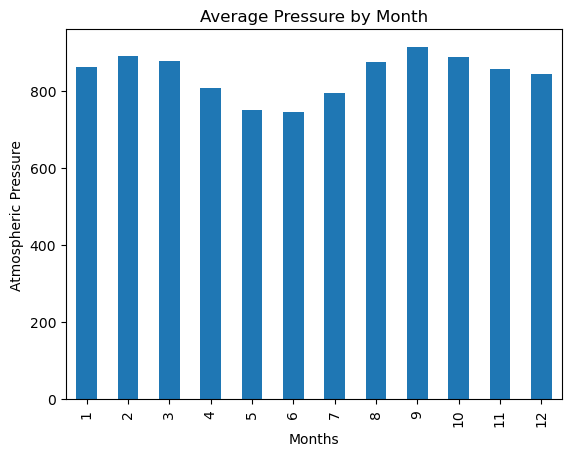

<Figure size 640x480 with 0 Axes>

In [24]:
# Plot the average pressure by month
avg_pressure.plot.bar()
plt.title('Average Pressure by Month')
plt.xlabel('Months')
plt.ylabel('Atmospheric Pressure')
plt.show()
plt.tight_layout()

In [25]:
# 5. How many terrestrial (earth) days are there in a Martian year? 
#Consider how many days elapse on Earth in the time that Mars circles the Sun once.

# find first recorded earth date
first_ter_day = df['terrestrial_date'].agg('min')

# create a new df with min temps from each record and the calculated # of earth days
ter_days_min_temps_df = pd.DataFrame({
    "min_temp": df['min_temp'],
    "ter_days":df['terrestrial_date'] - first_ter_day })
ter_days_min_temps_df

,min_temp,ter_days
0,-75.0,0 days
1,-75.0,0 days
2,-75.0,0 days
3,-75.0,0 days
4,-75.0,0 days
...,...,...
13064,-77.0,2021 days
13065,-77.0,2021 days
13066,-77.0,2021 days
13067,-77.0,2021 days


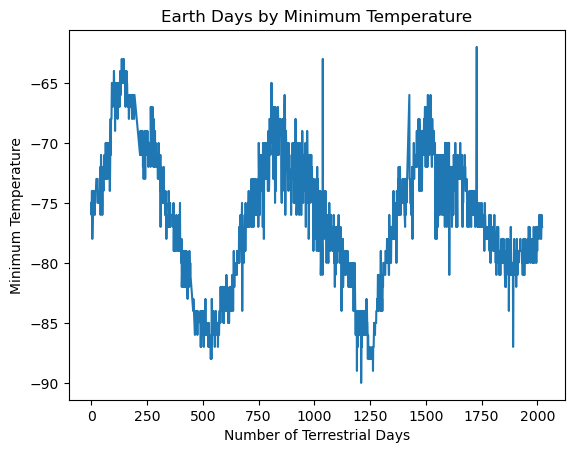

In [26]:
# plot the int value of earth days versus the min_temps for each sol record
plt.plot(ter_days_min_temps_df["ter_days"].dt.days, ter_days_min_temps_df["min_temp"])
plt.title('Earth Days by Minimum Temperature')
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature")
plt.show()
#answer: a martian year seems to be 675 (the distance from peak to peak, for ex. first two peaks approx. 875-200=675) earth days

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [27]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', header=True, index=False, date_format='%Y-%m-%d')

In [28]:
browser.quit()